## Comparison of the two results between part 2 and 2B

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

Output_path = "/content/gdrive/MyDrive/Project 1/Output/"         # Path output
Output_path2 = "/content/gdrive/MyDrive/Project 1/Output/Prob2"   # Path problem2
Output_path2B = "/content/gdrive/MyDrive/Project 1/Output/Prob2B" # Path problem2 part B

#Importation file problem2
fileName_windows= "windows_output.xlsx"
path_windows = os.path.join(Output_path2,fileName_windows)
fileName_Opaque= "Opaque_output.xlsx"
path_Opaque = os.path.join(Output_path2,fileName_Opaque)
fileName_Results="Results_output.xlsx"
path_Results= os.path.join(Output_path2,fileName_Results)

Windows2_DF=pd.read_excel(path_windows,index_col=0,header=0)
Results2_DF=pd.read_excel(path_Results,index_col=0,header=0)
Opaque2_DF=pd.read_excel(path_Opaque,index_col=0,header=0)

#Importation file problem2 part B
fileName_windows2B= "windows_output.xlsx"
path_windows2B = os.path.join(Output_path2B,fileName_windows2B)
fileName_Opaque2B= "Opaque_output.xlsx"
path_Opaque2B = os.path.join(Output_path2B,fileName_Opaque2B)
fileName_Results2B="Results_output.xlsx"
path_Results2B= os.path.join(Output_path2B,fileName_Results2B)

Windows2B_DF=pd.read_excel(path_windows2B,index_col=0,header=0)
Results2B_DF=pd.read_excel(path_Results2B,index_col=0,header=0)
Opaque2B_DF=pd.read_excel(path_Opaque2B,index_col=0,header=0)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
DeltaQ_Heating_Wall = Opaque2_DF.loc["Walls", "Q Heating"]- Opaque2B_DF.loc["Walls", "Q Heating"]
DeltaQ_Cooling_Wall = Opaque2_DF.loc["Walls", "Q Cooling"]- Opaque2B_DF.loc["Walls", "Q Cooling"]
DeltaQ_subtot_heating = DeltaQ_Heating_Wall*(1+Results2B_DF.loc["fdl_heating","Value"])
DeltaQ_subtot_cooling = DeltaQ_Cooling_Wall*(1+Results2B_DF.loc["fdl_cooling","Value"])
DeltaQ_tot_heating_percentage = round(DeltaQ_subtot_heating*100/Results2_DF.loc["Q tot heating sensible","Value"],4)
DeltaQ_tot_cooling_percentage = round(DeltaQ_subtot_cooling*100/Results2_DF.loc["Q tot cooling sensible","Value"],4)

print(f"The percentage of heating reduction is "+str(DeltaQ_tot_heating_percentage)+ " %\n""The percentage of cooling reduction is "+str(DeltaQ_tot_cooling_percentage) + " %")

The percentage of heating reduction is 4.869 %
The percentage of cooling reduction is 3.6779 %


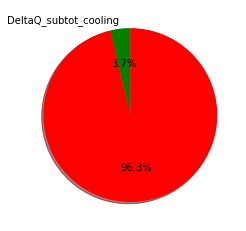

In [27]:
fig5=plt.figure()
Items = [DeltaQ_subtot_cooling,Results2_DF.loc["Q tot cooling sensible","Value"]-DeltaQ_subtot_cooling]
Q=["DeltaQ_subtot_cooling",""]
cols= ["g","r"]
plt.pie(Items,colors=cols , labels=Q, startangle=90, shadow=True,explode=(0,0), autopct="%1.1f%%")
plot5_name="Delta_Cooling_percentange.png"
path_toSave_thisFigure=os.path.join(Output_path,plot5_name)
fig5.savefig(path_toSave_thisFigure)

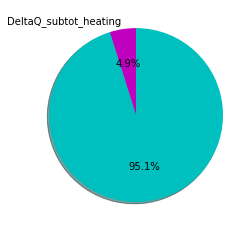

In [29]:
fig6=plt.figure()
Items = [DeltaQ_subtot_heating,Results2_DF.loc["Q tot heating sensible","Value"]-DeltaQ_subtot_heating]
Q=["DeltaQ_subtot_heating",""]
cols= ["m","c"]
plt.pie(Items,colors=cols , labels=Q, startangle=90, shadow=True,explode=(0,0), autopct="%1.1f%%")
plot6_name="Delta_Heating_percentange.png"
path_toSave_thisFigure=os.path.join(Output_path,plot6_name)
fig6.savefig(path_toSave_thisFigure)